In [1]:
import matplotlib.pyplot as plt
import numpy as np
import teneva
from time import perf_counter as tpc
np.random.seed(42)

Der # 1 | Error nrm : 8.6e-13 | Error max : 2.3e-11
Der # 2 | Error nrm : 2.5e-09 | Error max : 2.9e-08
Der # 3 | Error nrm : 8.4e-06 | Error max : 3.2e-04


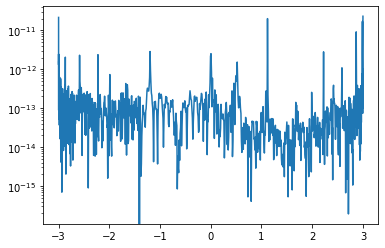

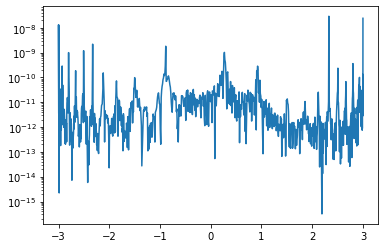

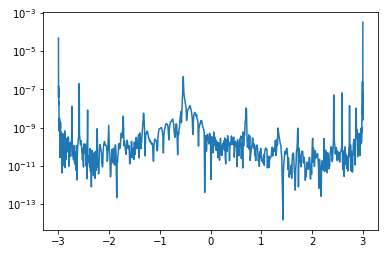

In [2]:
a = -3.   # Grid lower bound
b = +3.   # Grid upper bound
n = 1000   # Grid size

# Function and its first derivative:
f     = lambda x: np.sin(x**3) + np.exp(-x**2)

# Chebyshev grid and function values on the grid:
i = np.arange(n)
x = teneva.ind_to_poi(i, a, b, n, kind='cheb')
y = f(x)

D1, D2, D3 = teneva.cheb_diff_matrix(a, b, n, m=3)
z = [D1 @ y, D2 @ y, D3 @ y]

z1_real = 3. * x**2 * np.cos(x**3) - 2. * x * np.exp(-x**2)

z2_real = 6. * x * np.cos(x**3) - 9. * x**4 * np.sin(x**3)
z2_real += - 2. * np.exp(-x**2) + 4. * x**2 * np.exp(-x**2)

z3_real = 6. * np.cos(x**3) - 18. * x**3 * np.sin(x**3)
z3_real += - 36. * x**3 * np.sin(x**3) - 27. * x**6 * np.cos(x**3)
z3_real += 4. * x * np.exp(-x**2)
z3_real += 8. * x * np.exp(-x**2) - 8. * x**3 * np.exp(-x**2)

z_real = [z1_real, z2_real, z3_real]

for k in range(3):
    e_nrm = np.linalg.norm(z[k] - z_real[k]) / np.linalg.norm(z_real[k])
    e_max = np.max(np.abs(z[k] - z_real[k]) / np.abs(z_real[k]))
    print(f'Der # {k+1} | Error nrm : {e_nrm:-7.1e} | Error max : {e_max:-7.1e}')
    
for k in range(3):
    plt.plot(x, abs(z_real[k]-z[k])/abs(z_real[k]), '-')
    plt.semilogy()
    plt.show()

In [3]:
a_all = np.linspace(1., 10., 10)
b_all = -a_all
n = 1000

for a, b in zip(a_all, b_all):
    f = lambda x: np.sin(x**3) + np.exp(-x**2)
    i = np.arange(n)
    x = teneva.ind_to_poi(i, a, b, n, kind='cheb')
    y = f(x)

    D = teneva.cheb_diff_matrix(a, b, n, m=1)
    z = D @ y

    z_real = 3. * x**2 * np.cos(x**3) - 2. * x * np.exp(-x**2)

    e_nrm = np.linalg.norm(z - z_real) / np.linalg.norm(z_real)
    e_max = np.max(np.abs(z - z_real) / np.abs(z_real))
    print(f'a: {a:-8.4f} | b: {b:-8.4f} | Error nrm : {e_nrm:-7.1e} | Error max : {e_max:-7.1e}')

a:   1.0000 | b:  -1.0000 | Error nrm : 1.4e-12 | Error max : 1.3e-10
a:   2.0000 | b:  -2.0000 | Error nrm : 4.8e-13 | Error max : 1.6e-10
a:   3.0000 | b:  -3.0000 | Error nrm : 8.6e-13 | Error max : 1.8e-10
a:   4.0000 | b:  -4.0000 | Error nrm : 8.7e-13 | Error max : 2.0e-11
a:   5.0000 | b:  -5.0000 | Error nrm : 2.5e-12 | Error max : 4.6e-11
a:   6.0000 | b:  -6.0000 | Error nrm : 1.8e-12 | Error max : 2.6e-11
a:   7.0000 | b:  -7.0000 | Error nrm : 2.6e-12 | Error max : 3.8e-11
a:   8.0000 | b:  -8.0000 | Error nrm : 2.2e-12 | Error max : 4.3e-10
a:   9.0000 | b:  -9.0000 | Error nrm : 2.9e-12 | Error max : 6.4e-11
a:  10.0000 | b: -10.0000 | Error nrm : 1.0e+00 | Error max : 4.8e+01


In [5]:
a_all = np.linspace(1., 20., 20)
b_all = -a_all
n = 2000

for a, b in zip(a_all, b_all):
    f = lambda x: np.sin(x**3) + np.exp(-x**2)
    i = np.arange(n)
    x = teneva.ind_to_poi(i, a, b, n, kind='cheb')
    y = f(x)

    D = teneva.cheb_diff_matrix(a, b, n, m=1)
    z = D @ y

    z_real = 3. * x**2 * np.cos(x**3) - 2. * x * np.exp(-x**2)

    e_nrm = np.linalg.norm(z - z_real) / np.linalg.norm(z_real)
    e_max = np.max(np.abs(z - z_real) / np.abs(z_real))
    print(f'a: {a:-8.4f} | b: {b:-8.4f} | Error nrm : {e_nrm:-7.1e} | Error max : {e_max:-7.1e}')

a:   1.0000 | b:  -1.0000 | Error nrm : 4.1e-12 | Error max : 1.1e-10
a:   2.0000 | b:  -2.0000 | Error nrm : 5.3e-13 | Error max : 4.8e-10
a:   3.0000 | b:  -3.0000 | Error nrm : 2.0e-12 | Error max : 7.9e-11
a:   4.0000 | b:  -4.0000 | Error nrm : 8.6e-13 | Error max : 2.4e-11
a:   5.0000 | b:  -5.0000 | Error nrm : 8.6e-12 | Error max : 1.4e-10
a:   6.0000 | b:  -6.0000 | Error nrm : 4.1e-12 | Error max : 1.1e-10
a:   7.0000 | b:  -7.0000 | Error nrm : 5.5e-12 | Error max : 2.5e-10
a:   8.0000 | b:  -8.0000 | Error nrm : 1.9e-12 | Error max : 4.2e-11
a:   9.0000 | b:  -9.0000 | Error nrm : 1.4e-11 | Error max : 5.4e-10
a:  10.0000 | b: -10.0000 | Error nrm : 6.0e-12 | Error max : 1.9e-08
a:  11.0000 | b: -11.0000 | Error nrm : 5.0e-12 | Error max : 3.2e-10
a:  12.0000 | b: -12.0000 | Error nrm : 2.1e-01 | Error max : 1.6e+02
a:  13.0000 | b: -13.0000 | Error nrm : 1.1e+00 | Error max : 6.6e+04
a:  14.0000 | b: -14.0000 | Error nrm : 1.1e+00 | Error max : 8.6e+01
a:  15.0000 | b: -15